# Logistic Regression

The classification algorithms were referenced from : https://machinelearningmastery.com/machine-learning-algorithms-mini-course/

In [123]:
from sklearn.linear_model import LogisticRegression
log_class_model = LogisticRegression(random_state=0, multi_class='ovr')

In [124]:
df.shape

(681716, 18)

In [125]:
df.head(20)

,Accident_Index,Vehicle_Reference,Vehicle_Type,Towing_and_Articulation,Vehicle_Manoeuvre,Vehicle_Location-Restricted_Lane,Junction_Location,Skidding_and_Overturning,Hit_Object_in_Carriageway,Vehicle_Leaving_Carriageway,Hit_Object_off_Carriageway,1st_Point_of_Impact,Was_Vehicle_Left_Hand_Drive?,Sex_of_Driver,Age_Band_of_Driver,Engine_Capacity_(CC),Propulsion_Code,Age_of_Vehicle
0,2019010128300,1,9.0,0.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,1.0,1.0,9.0,1242.0,1.0,4.0
1,2019010128300,2,9.0,0.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,1.0,1.0,9.0,1242.0,1.0,4.0
2,2019010152270,1,9.0,0.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,2.0,5.0,1242.0,1.0,4.0
3,2019010152270,2,9.0,0.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,2.0,5.0,1242.0,1.0,4.0
4,2019010155191,1,9.0,0.0,3.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,1.0,1.0,7.0,1242.0,1.0,4.0
5,2019010155191,2,1.0,0.0,4.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,6.0,1242.0,1.0,4.0
6,2019010155192,1,9.0,0.0,18.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,6.0,1242.0,1.0,4.0
7,2019010155194,1,9.0,0.0,18.0,0.0,1.0,0.0,0.0,0.0,0.0,4.0,1.0,2.0,8.0,1242.0,1.0,4.0
8,2019010155194,2,9.0,0.0,7.0,0.0,2.0,0.0,0.0,0.0,0.0,1.0,1.0,2.0,5.0,1242.0,1.0,4.0
9,2019010155195,1,9.0,0.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,4.0,1242.0,1.0,4.0


In [126]:
# Reading the dataset for the casualty information
df_cas = pd.read_csv("../Dataset/Road_Safety_Data_Casualties_2019.csv",low_memory=False)
df_cas.head(20) #confirm correct data is imported

,Accident_Index,Vehicle_Reference,Casualty_Reference,Casualty_Class,Sex_of_Casualty,Age_of_Casualty,Age_Band_of_Casualty,Casualty_Severity,Pedestrian_Location,Pedestrian_Movement,Car_Passenger,Bus_or_Coach_Passenger,Pedestrian_Road_Maintenance_Worker,Casualty_Type,Casualty_Home_Area_Type,Casualty_IMD_Decile
0,2019010128300,1,1,1,1,58,9,3,0,0,0,0,0,9,1,2
1,2019010128300,1,2,2,2,-1,-1,3,0,0,1,0,0,9,1,5
2,2019010128300,1,3,2,2,-1,-1,3,0,0,2,0,0,9,1,5
3,2019010152270,1,1,1,2,24,5,3,0,0,0,0,0,9,1,3
4,2019010155191,2,1,2,2,21,5,3,0,0,0,0,0,1,1,1
5,2019010155192,1,1,3,1,68,10,2,5,4,0,0,0,0,1,4
6,2019010155194,1,1,1,2,47,8,3,0,0,0,0,0,9,1,3
7,2019010155194,1,2,2,2,16,4,3,0,0,1,0,0,9,1,3
8,2019010155195,1,1,1,1,20,4,3,0,0,0,0,0,9,1,4
9,2019010155195,1,2,2,1,41,7,3,0,0,2,0,0,9,1,5


In [127]:
#checking the size of casualty database
df_cas.shape

(153158, 16)

We only need the casuatly seversity information from the casualty database. Dropping all other columns.

In [128]:
df_cas.drop(['Casualty_Reference','Casualty_Class','Sex_of_Casualty','Age_of_Casualty','Age_Band_of_Casualty','Pedestrian_Location','Pedestrian_Movement','Car_Passenger','Bus_or_Coach_Passenger','Pedestrian_Road_Maintenance_Worker','Casualty_Type','Casualty_Home_Area_Type','Casualty_IMD_Decile']
, axis=1, inplace=True)

In [129]:
df_cas.shape

(153158, 3)

In [130]:
df_cas.head()

,Accident_Index,Vehicle_Reference,Casualty_Severity
0,2019010128300,1,3
1,2019010128300,1,3
2,2019010128300,1,3
3,2019010152270,1,3
4,2019010155191,2,3


In [131]:
df_cas.Accident_Index.nunique()

117536

##### Merging the casulty serverity information to vehicle database

In [132]:
df_merge=pd.merge(df,df_cas)

In [133]:
df_merge.shape

(153158, 19)

In [134]:
df_merge.head(10)

,Accident_Index,Vehicle_Reference,Vehicle_Type,Towing_and_Articulation,Vehicle_Manoeuvre,Vehicle_Location-Restricted_Lane,Junction_Location,Skidding_and_Overturning,Hit_Object_in_Carriageway,Vehicle_Leaving_Carriageway,Hit_Object_off_Carriageway,1st_Point_of_Impact,Was_Vehicle_Left_Hand_Drive?,Sex_of_Driver,Age_Band_of_Driver,Engine_Capacity_(CC),Propulsion_Code,Age_of_Vehicle,Casualty_Severity
0,2019010128300,1,9.0,0.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,1.0,1.0,9.0,1242.0,1.0,4.0,3
1,2019010128300,1,9.0,0.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,1.0,1.0,9.0,1242.0,1.0,4.0,3
2,2019010128300,1,9.0,0.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,1.0,1.0,9.0,1242.0,1.0,4.0,3
3,2019010152270,1,9.0,0.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,2.0,5.0,1242.0,1.0,4.0,3
4,2019010155191,2,1.0,0.0,4.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,6.0,1242.0,1.0,4.0,3
5,2019010155192,1,9.0,0.0,18.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,6.0,1242.0,1.0,4.0,2
6,2019010155194,1,9.0,0.0,18.0,0.0,1.0,0.0,0.0,0.0,0.0,4.0,1.0,2.0,8.0,1242.0,1.0,4.0,3
7,2019010155194,1,9.0,0.0,18.0,0.0,1.0,0.0,0.0,0.0,0.0,4.0,1.0,2.0,8.0,1242.0,1.0,4.0,3
8,2019010155195,1,9.0,0.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,4.0,1242.0,1.0,4.0,3
9,2019010155195,1,9.0,0.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,4.0,1242.0,1.0,4.0,3


In [135]:
df_merge.shape

(153158, 19)

In [136]:
df_merge.isnull().sum().sort_values(ascending=False)

Casualty_Severity                   0
Hit_Object_in_Carriageway           0
Vehicle_Reference                   0
Vehicle_Type                        0
Towing_and_Articulation             0
Vehicle_Manoeuvre                   0
Vehicle_Location-Restricted_Lane    0
Junction_Location                   0
Skidding_and_Overturning            0
Vehicle_Leaving_Carriageway         0
Age_of_Vehicle                      0
Hit_Object_off_Carriageway          0
1st_Point_of_Impact                 0
Was_Vehicle_Left_Hand_Drive?        0
Sex_of_Driver                       0
Age_Band_of_Driver                  0
Engine_Capacity_(CC)                0
Propulsion_Code                     0
Accident_Index                      0
dtype: int64

In [137]:
df_merge['Casualty_Severity'].describe()

count    153158.000000
mean          2.807721
std           0.422122
min           1.000000
25%           3.000000
50%           3.000000
75%           3.000000
max           3.000000
Name: Casualty_Severity, dtype: float64

In [138]:
df_merge['Casualty_Severity'].value_counts()

3    125461
2     25945
1      1752
Name: Casualty_Severity, dtype: int64

In [139]:
df_merge['Casualty_Severity'].value_counts(normalize=True)

3    0.819161
2    0.169400
1    0.011439
Name: Casualty_Severity, dtype: float64

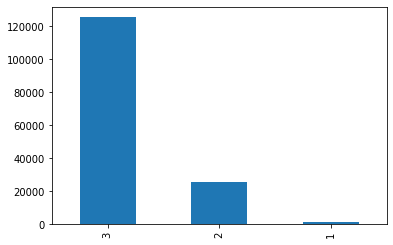

In [140]:
df_merge['Casualty_Severity'].value_counts().plot.bar()

##### As seen from the information above this dataset is unbalanced. The sample size for Casualty serverity of '1' is very low, only around 1%. Taking the dataset as is will not yeild good prediction.

In [141]:
# Splitting the data into train and test mode
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [142]:
df_merge.select_dtypes(include=[np.number]).columns.values

array(['Vehicle_Reference', 'Vehicle_Type', 'Towing_and_Articulation',
       'Vehicle_Manoeuvre', 'Vehicle_Location-Restricted_Lane',
       'Junction_Location', 'Skidding_and_Overturning',
       'Hit_Object_in_Carriageway', 'Vehicle_Leaving_Carriageway',
       'Hit_Object_off_Carriageway', '1st_Point_of_Impact',
       'Was_Vehicle_Left_Hand_Drive?', 'Sex_of_Driver',
       'Age_Band_of_Driver', 'Engine_Capacity_(CC)', 'Propulsion_Code',
       'Age_of_Vehicle', 'Casualty_Severity'], dtype=object)

In [143]:
# Providing a split of 70:30 for train/test purpose

predictor_cols = ['Vehicle_Type',
'Towing_and_Articulation',
'Vehicle_Manoeuvre',
'Vehicle_Location-Restricted_Lane',
'Junction_Location',
'Skidding_and_Overturning',
'Hit_Object_in_Carriageway',
'Vehicle_Leaving_Carriageway',
'Hit_Object_off_Carriageway',
'1st_Point_of_Impact',
'Was_Vehicle_Left_Hand_Drive?',
'Sex_of_Driver',
'Age_Band_of_Driver',
'Engine_Capacity_(CC)',
'Propulsion_Code',
'Age_of_Vehicle']
X_train, X_test, y_train, y_test = train_test_split(df_merge[predictor_cols],df_merge.Casualty_Severity, test_size=0.3)

In [144]:
log_class_model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=None, penalty='l2', random_state=0,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False)

##### Measuring the accuracy of the model.

In [145]:
score_logistic = log_class_model.score(X_test, y_test)

In [146]:
score_logistic

0.8194045442674327

We got an accuracy of 81.94 percent with this model and the unbalanced dataset.
We will try to resize the database to balance it. 
We will apply the logistic regression model again after that.

##### Confusion Matrix to analyze the performance:

In [147]:
y_predicted = log_class_model.predict(X_test)

In [148]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_predicted)

array([[    0,     0,   518],
       [    0,     3,  7776],
       [    0,     4, 37647]])

In [149]:
y_predicted2 = log_class_model.predict(X_train)

In [150]:
confusion_matrix(y_train, y_predicted2)

array([[    0,     2,  1232],
       [    0,     6, 18160],
       [    0,    25, 87785]])

# Scaled dataset

##### Scaling of dataset was suggested in error due to inability to process the dataset.

In [151]:
from sklearn import preprocessing
X_SCALED = preprocessing.scale(X_train)

In [152]:
log_class_model.fit(X_SCALED, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=None, penalty='l2', random_state=0,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False)

In [153]:
score_logistic_scaled = log_class_model.score(X_test, y_test)

In [154]:
score_logistic_scaled

0.011273613650213284

### Scaling results in huge drop in accuracy

In [155]:
y_predicted = log_class_model.predict(X_test)

In [156]:
confusion_matrix(y_test, y_predicted)

array([[  518,     0,     0],
       [ 7779,     0,     0],
       [37651,     0,     0]])

# Adding more classifiers

In [157]:
import sklearn
from sklearn import ensemble

In [158]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

# AdaBoost Default Classifier

In [159]:
ada_class_model_def = AdaBoostClassifier()

In [160]:
ada_class_model_def.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=None)

In [161]:
score_ada_boost = ada_class_model_def.score(X_test, y_test)

In [162]:
score_ada_boost

0.8205580221119526

In [163]:
y_predicted = ada_class_model_def.predict(X_test)

In [164]:
confusion_matrix(y_test, y_predicted)

array([[    1,    31,   486],
       [    2,   148,  7629],
       [    2,    95, 37554]])

# Adaboost Custom settings Classifier

Reference: https://towardsdatascience.com/machine-learning-part-17-boosting-algorithms-adaboost-in-python-d00faac6c464

In [165]:
ada_class_model_cus = AdaBoostClassifier(n_estimators=200, learning_rate = .5)

In [166]:
ada_class_model_cus.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=0.5,
                   n_estimators=200, random_state=None)

In [167]:
score_ada_boost_cus = ada_class_model_cus.score(X_test, y_test)

In [168]:
score_ada_boost_cus

0.8209280055715156

In [169]:
y_predicted = ada_class_model_cus.predict(X_test)

In [170]:
confusion_matrix(y_test, y_predicted)

array([[    0,    33,   485],
       [    0,   174,  7605],
       [    1,   104, 37546]])

# RandomForestClassifier

In [171]:
rand_class_model_def = RandomForestClassifier()

In [172]:
rand_class_model_def.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [173]:
score_rand_class = rand_class_model_def.score(X_test, y_test)

In [174]:
score_rand_class

0.8026247061896057

# Comparing different models

In [175]:
x_axis = ['Logistic', 'Logistic_scaled', 'AdaBoost', 'AdaBoost_custom', 'RandomForest']
y_axis = [score_logistic, score_logistic_scaled, score_ada_boost, score_ada_boost_cus, score_rand_class]

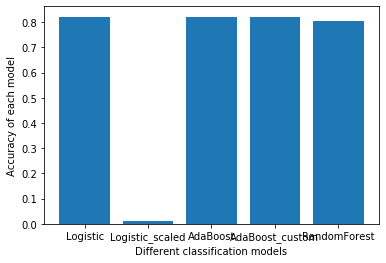

In [176]:
plt.bar(x_axis, y_axis)
plt.xlabel("Different classification models") 
plt.ylabel("Accuracy of each model")
plt.show()

### As seen above Scaling of data gives worst results with Logistic regression classifier. All other classification models give nearly similar results with logisctic regression providing best results

# Undersampling

Reference:
https://github.com/codebasics/py/blob/master/DeepLearningML/14_imbalanced/handling_imbalanced_data.ipynb

In [177]:
df_severity_1 = df_merge[df_merge.Casualty_Severity == 1]
df_severity_2 = df_merge[df_merge.Casualty_Severity == 2]
df_severity_3 = df_merge[df_merge.Casualty_Severity == 3]
#df_severity_3 = df_merge[df_merge['Casualty_Severity'] == 3]

In [178]:
df_severity_1.shape

(1752, 19)

In [179]:
df_severity_2.shape

(25945, 19)

In [180]:
df_severity_3.shape

(125461, 19)

##### We will try to undersample seerity 3 with the number from severity 2. If we sample based on severity 1 the dataset will become very small

In [181]:
df_severity_3_undersampled = df_severity_3.sample(df_severity_2.shape[0])

In [182]:
df_severity_3_undersampled.shape

(25945, 19)

In [183]:
df_combined_undersampled = pd.concat([df_severity_1, df_severity_2, df_severity_3_undersampled], axis=0)

In [184]:
df_combined_undersampled.shape

(53642, 19)

In [185]:
X_train_under, X_test_under, y_train_under, y_test_under = train_test_split(df_combined_undersampled[predictor_cols],df_combined_undersampled.Casualty_Severity, test_size=0.3)

In [186]:
log_class_model.fit(X_train_under, y_train_under)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=None, penalty='l2', random_state=0,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False)

In [187]:
score_logistic_under = log_class_model.score(X_test_under, y_test_under)

In [188]:
score_logistic_under

0.5686323246131858

### Undersampling reduces the accuracy of the model

In [189]:
y_predicted_under = log_class_model.predict(X_test_under)

In [190]:
confusion_matrix(y_test_under, y_predicted_under)

array([[   0,  352,  148],
       [   0, 4891, 2933],
       [   0, 3509, 4260]])

# Oversampling

##### For Oversampling To oversample severity 1 to level of 3 is going to be very high over sampling. Oversampling both severity 1 and 2 to 100000 samples

In [191]:
df_severity_1_over = df_severity_1.sample(50000, replace = True)
df_severity_2_over = df_severity_2.sample(50000, replace = True)

In [192]:
df_combined_oversampled = pd.concat([df_severity_1_over, df_severity_2_over, df_severity_3], axis=0)

In [193]:
df_combined_oversampled.shape

(225461, 19)

In [194]:
X_train_over, X_test_over, y_train_over, y_test_over = train_test_split(df_combined_oversampled[predictor_cols],df_combined_oversampled.Casualty_Severity, test_size=0.3)

In [195]:
log_class_model.fit(X_train_over, y_train_over)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=None, penalty='l2', random_state=0,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False)

In [196]:
score_logistic_over = log_class_model.score(X_test_over, y_test_over)

In [197]:
score_logistic_over

0.5640237141294224

In [198]:
y_predicted_over = log_class_model.predict(X_test_over)

In [199]:
confusion_matrix(y_test_under, y_predicted_under)

array([[   0,  352,  148],
       [   0, 4891, 2933],
       [   0, 3509, 4260]])

In [200]:
y_axis = [score_logistic, score_logistic_under, score_logistic_over]
x_axis = ['score_logistic', 'score_logistic_under', 'score_logistic_over']

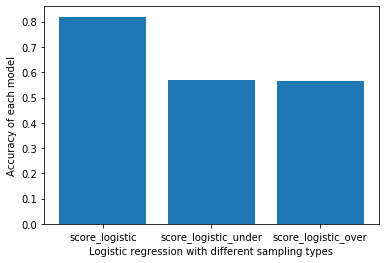

In [201]:
plt.bar(x_axis, y_axis)
plt.xlabel("Logistic regression with different sampling types") 
plt.ylabel("Accuracy of each model")
plt.show()

### As seen in the graph above over sampling and under sampling of this inbalanced data is not improving the accuracy